## Introduction

On the micro scale, the universe is comprised of particles. Fundamentally, these particles experience some of the same interactions with the world that larger objects do, and have some of the same properties, such as mass. One quality which has an analogue in both scales is potential energy.

In macro scale physics, potential energy is often qualified by height from a body of mass, and requires energy to increase, with objects wanting to minimize their potential energy. In particle physics, potentials exist around most particles, and arrangements of them can have a potential gradient, which look similar to the landscape of a large body in regards to the magnitudes of potential energies.

Modelling the motion and behaviour of a particle in a region of potential energy is dependent on the landscape of the potential. For a simple orientation, such as a single charged particle, it can most often be modelled using deflections or an analogue of free-falling. However, as more bodies become involved and the field becomes more complex, the motion of a particle becomes harder to model.

<table class="image">
<caption align="bottom">{{From user Koantum on Wikipedia}}</caption>
<tr><td><img src="files/Potential Energy Well.png" alt="From user Koantum on Wikipedia"/></td></tr>
</table>

$$U(r >= R) = -U_0$$

$$U(r < R) = 0$$


A particularly difficult example in the simplest of formations is the finite potential well. This structure is defined as an area of lower potential in an otherwise flat potential field. However, the factor that makes this non-trivial is the fact that the well has sheer walls; they cannot be classically defined as having a slope. This is important because the force a particle experiences as it moves through a field is relative to the slope of the potential change. (1)


$$\vec{F} = -\hat{x}\frac{\partial{U}}{\partial{x}}$$
$$\vec{F} = m\frac{\partial^2{\vec{x}}}{\partial{t^2}}$$
$$\frac{\mathrm{dv_x} }{\mathrm{d} t}=-\frac{1}{m}\frac{\partial U}{\partial x}$$

## Numerical Model - Euler's Method & The Heaviside Step Function

In order to most effectively model this situation, we must utilize some way of modelling the square well. Given the boundary conditions, a complex polynomial could be used, but fitting such a function would be difficult. Instead, the function that is used in this notebook is the Heaviside Step Function.

<table class="image">
<caption align="bottom">{{From user Omegatron on Wikipedia}}</caption>
<tr><td><img src="files/Heaviside Step Function.png" alt="From user Omegatron on Wikipedia"/></td></tr>
</table>

The Heaviside Step Function is a well defined, discontinuous function whose derivative is the Dirac-Delta Function. Both functions, however, are discontinuous. As defined previously, the force a particle experiences is relative to the slope of the potential at that point. Traditionally, this would be a problem. However, an approximation of the Heaviside exists (2) that is a continuous function that can be scaled and stretched to serve any square well function.

$$H(x) = \frac{1}{1+e^{-2k(x-R)}}$$
$$\frac{\partial H(x)}{\partial x}=\frac{2k(x-r)e^{-2k(x-R)}}{(1+e^{-2k(x-R)})^2}$$

In this notebook, the function of potential is defined piecewise, with one one component for when $X<0$ and one for when $X>=0$. Notably, the two functions are equal at 0, and as they approach infinity. However, their derivatives are not. By taking the slope of the potential at a given point, the instantaneous force the particle is under can be calculated.

In order to model the whole motion of the particle, an Euler Approximation is used. At each step, the particle (which possesses a mass m) experiences a force (or lack of one), which gives rise to a proportional acceleration. The particle is initialized with both an initial position and velocity, both restricted to 1D coordinates in this notebook. Using a finite, constant timestep, the motion of the particle can be modelled by the kinematic equations. Given the velocity and position at the beginning of a timestep, its position at the end of the timestep can be approximated.

Compared to a normal kinematic model, however, the acceleration is not constant. Thus, the velocity must also be also be subject to change over time. In a given time step, the acceleration can be treated as constant. Thus, the velocity at the end will be different than the beginning, and this value is passed as the constant velocity to the next segment. By repeating this, an approximation of the movement can be generated. The smaller the steps, the more this holds true, but the longer the model takes.

## Code

In [2]:
# Import block
import numpy as np
import matplotlib.pyplot as plt
import math
import doctest
%matplotlib inline

In [10]:
# Function definitions
# k is universal constant
k = 3

def heaviside_Function (position, radius, potential):
    '''Defines the Heaviside Function for the well
    Note: Both this and the derivative have been scaled and shifted
    
    Arguments:
    position: vector of the particle's position in one axis
    radius: scalar length of radius
    potential: the potential of the well
    
    returns: value of potential at the current position'''
    if (position >=0):
        return potential/(1+np.exp(-2*k*(position-radius)))-potential
    else:
        return -potential/(1+np.exp(-2*k*(position+radius)))+potential

def heaviside_derivative (position, radius, potential):
    '''Defines the derivative at the current position
    
    Arguments:
    position: vector of the particle's position in one axis
    radius: scalar length of radius
    potential: the potential of the well
    
    returns: value of potential at the current position'''
    if (position >= 0):
        numerator = 2*k*potential*np.exp(2*k*(position-radius))
        denominator = np.exp(2*k*(position-radius))+1
    else:
        numerator = 2*k*potential*np.exp(2*k*(position+radius))
        denominator = np.exp(2*k*(position+radius))+1
    
    return numerator/(denominator**2)

def potential_Restriction(U_test = False):
    '''Restricts the possible values of potential to purely positive values, as defined in the problem set up.
    The "U_test" option defaults to a set value to make testing easy.
    
    >>> potential_Restriction(U_test=True)
    5000
    
    returns: The force outside the radius
    '''
    
    passing = False
    if (U_test == True):
        return 5000
    else:
        while(passing == False):
            U = int(input("Please enter a positive value of potential energy in Joules: "))
            if (U > 0):
                passing = True
            else:
                passing = False
        return U


def well_check (position, radius):
    '''Determines whether the particle is in the well (radius inclusive)
    
    >>> well_check (0, 1)
    True
    
    >>> well_check (3, 1)
    False
    
    >>> well_check (1, 1)
    True
    
    Arguments:
    position: position of particle
    radius: scalar magnitude of radius
    
    returns: truth value of whether it is inside or outside well'''

    # Compare position against radius and return result
    if (abs(position) <= radius):
        return True
    else:
        return False
    
def displacement (position, velocity, timestep):
    '''Generates the new position of the particle
    
    >>> displacement (0, 1, 1)
    1
    
    >>> displacement (-1, 1, 1)
    0
    
    >>> displacement (0, 2, 2)
    4
    
    Arguments:
    position: position of particle
    velocity: velocity of particle
    timestep: time difference between steps
    
    returns: new position'''
    
    
    return position + velocity * timestep

def velocity_change(velocity, position, radius, potential, timestep, mass):
    '''Uses heaviside function and timestep to calculate new velocity
    
    Arguments:
    velocity: particle velocity
    position: particle position
    radius: well radius
    potential: potential of inside well
    timestep: time difference between steps
    mass: mass of particle
    
    returns: new velocity'''
    
    # Calculate accelerations from Heaviside and use to find new velocities
    acceleration = 1 * (1/mass) * heaviside_derivative(position, radius, potential)
    velocity = velocity + acceleration * timestep
    
    return velocity

def total_energy (velocity, mass, potential):
    '''Produces the value of total energy at all times
    
    Arguments:
    velocity: current velocity
    mass: mass of particle
    potential: potential at current location
    
    returns: total energy'''
    
    kinetic = 0.5 * mass * (velocity ** 2)
    energy = kinetic + potential
    
    return energy

def motion_generator (iPosition, iVelocity, fTime, iTime, steps, radius, mass):
    '''Generates the motion data set
    
    Arguments:
    iPosition: initial position
    iVelocity: initial velocity
    fTime: ending time
    iTime: starting time
    steps: number of steps between start and finish
    radius: length of spherical radius
    mass: mass of particle
    
    returns:
    positions: list of positions
    velocities: list of velocities
    times: list of paired times'''
    
    # Assign value of well height
    potential_well = potential_Restriction(U_test = True)
    
    # Initialize lists
    positions = []
    velocities = []
    energies = []
    times = []
    positions.append(iPosition)
    velocities.append(iVelocity)
    times.append(iTime)
    if(well_check(iPosition,radius) == True):
        energies.append(0)
    else:
        energies.append(potential_well)
    
    # Create time step
    h = (fTime - iTime) / steps
    
    count = 0
    while (count < steps):
        # Calculate current energy total
        PotentialA = heaviside_Function(positions[count], radius, potential_well)
        energies.append(total_energy(velocities[count], mass, PotentialA))
        
        # Calculate new position
        positions.append(displacement(positions[count], velocities[count], h))
        
        # Calculate new velocity
        velocities.append(velocity_change(velocities[count], positions[count], radius, PotentialA, h, mass))
        
        # Increment count and times
        count += 1
        times.append(iTime + count*h)
    return positions, velocities, times, energies

doctest.testmod()

TestResults(failed=0, attempted=7)

In [11]:
# Constant block
R = 1                                      # Defines the length of the radius
Velocity = 0.5                         # Defines the initial velocity of the particle
initial_position = -5                 # Defines the starting position of the particle
mass = 10000                                # Defines mass of particle; default uses proton for sampling
    
# Time and steps block
t_0 = 0                                    # Starting time
t_final = 10                                # End time
steps = 100000                               # Number of steps in time; increase for more precision

# Test case
p1, v1, time, energy = motion_generator (initial_position, Velocity, t_final, t_0, steps, R, mass)

# Remove extreme start value
p1 = p1[1::]
v1 = v1[1::]
time = time[1::]
energy = energy[1::]

## Results

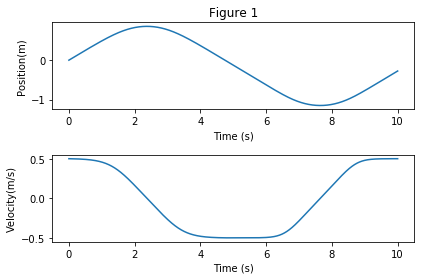

In [12]:
initial_position = 0
p1, v1, time, energy = motion_generator (initial_position, Velocity, t_final, t_0, steps, R, mass)

plt.subplot (2,1,1)
plt.plot (time, p1)
plt.title("Figure 1")
plt.xlabel("Time (s)")
plt.ylabel("Position(m)")
plt.savefig('Figure 1 Position.png')

plt.subplot (2,1,2)
plt.plot (time,v1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(m/s)")
plt.savefig('Figure 1 Velocity.png')

plt.tight_layout()
plt.show()

Figure 1 shows a particle that starts inside the well and has less total energy than the potential difference. As seen here, the particle experiences a sinusoidal motion that can be seen in the position graph. Its velocity also oscillates between positive and negative. While the particle is within the bounds of the well, the velocity is constant, reflecting the lack of potential difference inside the well.

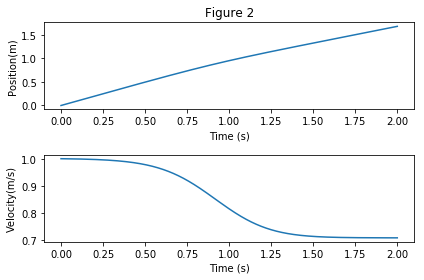

In [13]:
Velocity = 1
t_final = 2
p1, v1, time, energy = motion_generator (initial_position, Velocity, t_final, t_0, steps, R, mass)

plt.subplot (2,1,1)
plt.plot (time, p1)
plt.title("Figure 2")
plt.xlabel("Time (s)")
plt.ylabel("Position(m)")
plt.savefig('Figure 2 Position.png')

plt.subplot (2,1,2)
plt.plot (time,v1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(m/s)")
plt.savefig('Figure 2 Velocity.png')

plt.tight_layout()
plt.show()

Figure 2 shows a particle that starts inside the well, but with a higher velocity than the previous Figure. In this instance, it experiences the same amount of force, but because its velocity was higher to start with, it passes the edge of the well before its velocity would change sign. Once it is far enough away from the edge of the well, it no longer experiences a force, and continues with a constant velocity. In particular, the magnitude of the velocity after escaping the well is less than inside the well, reflecting the exchange of kinetic energy to potential energy in the process.

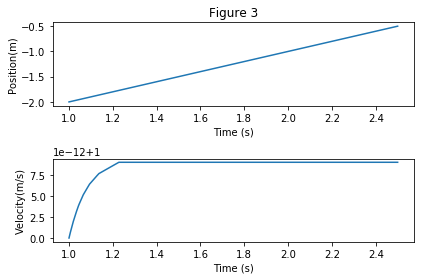

In [9]:
initial_position = -2
t_0 = 1
t_final = 2.5
p1, v1, time, energy = motion_generator (initial_position, Velocity, t_final, t_0, steps, R, mass)

plt.subplot (2,1,1)
plt.plot (time, p1)
plt.title("Figure 3")
plt.xlabel("Time (s)")
plt.ylabel("Position(m)")

plt.subplot (2,1,2)
plt.plot (time,v1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(m/s)")

plt.tight_layout()
plt.show()

Figure 3 shows a particle that starts outside of the well with a velocity towards the well. At first, it moves with a constant velocity, but as it approaches the edge of the well, it begins to accelerate. Once inside the well, it no longer experiences an acceleration and its velocity returns to a constant. However, unlike the previous example, this velocity is greater than the initial velocity, as it has converted potential energy to kinetic.

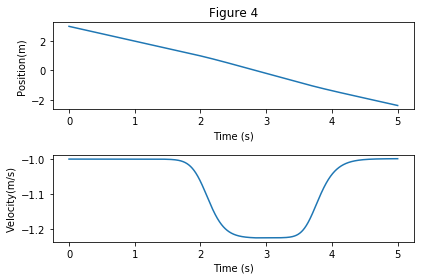

In [14]:
Velocity = -1
initial_position = 3
t_0 = 0
t_final = 5
p1, v1, time, energy = motion_generator (initial_position, Velocity, t_final, t_0, steps, R, mass)

plt.subplot (2,1,1)
plt.plot (time, p1)
plt.title("Figure 4")
plt.xlabel("Time (s)")
plt.ylabel("Position(m)")

plt.subplot (2,1,2)
plt.plot (time,v1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(m/s)")

plt.tight_layout()
plt.show()

Figure 4 serves to demonstrate that the same behaviour occurs if the particle starts on the other side, with a velocity towards the well. As an additional note, the time has been set such that the particle’s motion can be seen on both sides of the well. Once the particle is emerges on the other side of the potential well, it returns to its original velocity, showing the conservation of its energy through the well.

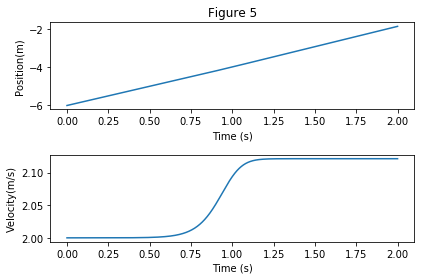

In [7]:
initial_position = -6
Velocity = 2
R = 4
p1, v1, time, energy = motion_generator (initial_position, Velocity, t_final, t_0, steps, R, mass)

plt.subplot (2,1,1)
plt.plot (time, p1)
plt.title("Figure 5")
plt.xlabel("Time (s)")
plt.ylabel("Position(m)")
plt.savefig('Figure 5 Position.png')

plt.subplot (2,1,2)
plt.plot (time,v1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(m/s)")
plt.savefig('Figure 5 Velocity.png')

plt.tight_layout()
plt.show()

Figure 5 illustrates the results on a larger well. By extending the radius of the well, the space where the particle moves in a lower potential is increased. However, despite the larger area of lower potential, the general trend in motion is preserved. A particle inside the well moves with constant velocity, and the total energy of the particle determines whether or not it can escape from the well. Thus, a particle that has more total energy than the well walls can always escape, no matter how large the well is.

## Analysis

The results above are consistent with the predictions of classical physics; a particle moving in a high potential region that transitions into a lower potential will gain kinetic energy. Similarly, a particle moving from a low potential region to a high one will lose it.

By using an approximation of the Heaviside Step Function, the finite square potential well can be modelled with results consistent with the theoretical models. Regardless of which side of the well the particle starts on, or how fast it is initially moving, a particle that starts in the high region will be able to escape the low region, while only particles with high energy can escape from the low region to the high region. A particle with less than the required energy will oscillate between the two walls with roughly constant velocity.

## Scientific Summary

This project could be used to abstract more complex fields. For instance, multiple wells could be defined, dividing the region piecewise in order for the approximations to hold. If generalized, it could even be used to produce a series of finite wells, with a desired spacing between them and maximum number of wells.

Assuming that the motion of the particle in space is independent in direction, it could also be generalized to suit 2D or 3D modelling, as described in the introduction. So long as the function of the potential along an axis is defined and not dependent on the other axes, then the motion of each component can be independently and tracked to show the particle’s orbit through the potential space. If properly generalized, the functions could describe the behaviour of even multiple variable dependent functions, so long as the derivative (partial or otherwise) were known.

Finally, looking at the data can give us an idea of the behaviour of different varieties of particles. Particles with the same mass, but different initial velocities might interact with the well differently, while particles with the same velocity but different masses will also react differently. By mapping multiple variants of the same set of conditions with one changing variable, an understanding of the particle’s behaviour can be produced and used to approximate information about potential real world particles.


## Personal Summary

This project taught me quite a few different things. Firstly, it taught me a new model in the Heaviside Step Function as a way of representing a delta function. It also taught me about how to scale and move functions, which was key to getting the function to work as the potential of the problem. Secondly, it also served to help refine my coding skills. I was forced to try and find ways of optimizing the program, and spent a lot of effort trying to minimize the amount of times functions were called unnecessarily. Making sure the program ran smoothly was a goal from the start, and integrating that into the functions as they were being written was a challenge that ultimately saved time in the end.

It also taught me a few things about the formatting of a code. From the start, I was working on instituting docstrings, which was helpful when it came time to test functions. I knew exactly what each function was using, and how it was using those, as well as what I could expect it to return. This made tracking inputs and outputs phenomenally more easy. An additional thing I cemented was the ability to select what was returned based on certain conditions. The Potential Restriction Function is capable of returning a set value for fast testing if a certain line is put into the main code. This made testing the function much faster than it would have otherwise been, but perfectly capable of being adapted to suit user input.

## References

1) Firk F.W.K. Essential Physics. Yale 2000.

2) Bracewell R. The Fourier Transform & Its Applications. 3rd ed. McGraw-Hill, 2000.